
  
## 1. 预测指标
#### 回归结果评价标准采用R-Square
**R2（R-Square）的公式为**：
残差平方和：
$$
SS_{res}=\sum\left(y_{i}-\hat{y}_{i}\right)^{2}
$$
总平均值:
$$
SS_{tot}=\sum\left(y_{i}-\overline{y}_{i}\right)^{2}
$$

其中$\overline{y}$表示$y$的平均值
得到$R^2$表达式为：
$$
R^{2}=1-\frac{SS_{res}}{SS_{tot}}=1-\frac{\sum\left(y_{i}-\hat{y}_{i}\right)^{2}}{\sum\left(y_{i}-\overline{y}\right)^{2}}
$$
$R^2$用于度量因变量的变异中可由自变量解释部分所占的比例，取值范围是 0~1，$R^2$越接近1,表明回归平方和占总平方和的比例越大,回归线与各观测点越接近，用x的变化来解释y值变化的部分就越多,回归的拟合程度就越好。所以$R^2$也称为拟合优度（Goodness of Fit）的统计量。

$y_{i}$表示真实值，$\hat{y}_{i}$表示预测值，$\overline{y}_{i}$表示样本均值。得分越高拟合效果越好。
  
  
## 2. 数据概况

**1.租赁基本信息：**
* ID——房屋编号　　　　　　　　　　　　　　　　　　
* area——房屋面积 　　　
* rentType——出租方式：整租/合租/未知　
* houseType——房型 　　　　　　　　　
* houseFloor——房间所在楼层：高/中/低　　　　　
* totalFloor——房间所在的总楼层数　　　　　　　　
* houseToward——房间朝向　　　　　　　　　　　
* houseDecoration——房屋装修　

* tradeTime——成交日期　　　　　　　　　　　　　　　
* tradeMoney——成交租金　

**2.小区信息：**
* CommunityName——小区名称　　　　　　　　
* city——城市　　　　　　　　　　　　　　　　　
* region——地区　　　　　　　　　　　　　　　
* plate——区域板块　　　　　　　　　　　　　　
* buildYear——小区建筑年代　　　　　　　　　　
* saleSecHouseNum——该板块当月二手房挂牌房源数　　　

**3.配套设施：**
* subwayStationNum——该板块地铁站数量　　　　　　　
* busStationNum——该板块公交站数量　　　　　　　　　
* interSchoolNum——该板块国际学校的数量　　　　　　
* schoolNum——该板块公立学校的数量　　　　　　　　
* privateSchoolNum——该板块私立学校数量　　　　　
* hospitalNum——该板块综合医院数量　　　　　　　　　
* DrugStoreNum——该板块药房数量　　　　　　　　
* gymNum——该板块健身中心数量　　　　　　　　　　
* bankNum——该板块银行数量　　　　　　　　　　　
* shopNum——该板块商店数量　　　　　　　　　　　
* parkNum——该板块公园数量　　　　　　　　　　　
* mallNum——该板块购物中心数量　　　　　　　　　
* superMarketNum——该板块超市数量　　　　　　　

**4.其他信息：**
* totalTradeMoney——该板块当月二手房成交总金额　　　
* totalTradeArea——该板块二手房成交总面积　　　　　　
* tradeMeanPrice——该板块二手房成交均价　　　　　　　
* tradeSecNum——该板块当月二手房成交套数　　　　　

* totalNewTradeMoney——该板块当月新房成交总金额　　　
* totalNewTradeArea——该板块当月新房成交的总面积　　　
* totalNewMeanPrice——该板块当月新房成交均价　　　　　
* tradeNewNum——该板块当月新房成交套数　　　　　　　　
* remainNewNum——该板块当月新房未成交套数　　　　　　
* supplyNewNum——该板块当月新房供应套数　　　　　　　

* supplyLandNum——该板块当月土地供应幅数　　　　　 
* supplyLandArea——该板块当月土地供应面积　　　　　
* tradeLandNum——该板块当月土地成交幅数　　　　　　
* tradeLandArea——该板块当月土地成交面积　　　　　 
* landTotalPrice——该板块当月土地成交总价　　　　　
* landMeanPrice——该板块当月楼板价(元/m^{2})　　　

* totalWorkers——当前板块现有的办公人数　　　　　　　
* newWorkers——该板块当月流入人口数（现招聘的人员）　
* residentPopulation——该板块常住人口　　　　　　　　

* pv——该板块当月租客浏览网页次数　　　　　　　　　　　
* uv——该板块当月租客浏览网页总人数　　　　　　　　　　
* lookNum——线下看房次数　　　　　　　　　　　　　　　
　　　　


In [1]:
#coding:utf-8
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

# GBDT
from sklearn.ensemble import GradientBoostingRegressor
# XGBoost
import xgboost as xgb
# LightGBM
import lightgbm as lgb

import pandas as pd
import numpy as np
#可以打印中文
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#显示最大行数
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
#载入数据
data_train = pd.read_csv('./data/train_data.csv')
data_train['Type'] = 'Train'
data_test = pd.read_csv('./data/test_a.csv')
data_test['Type'] = 'Test'
data_all = pd.concat([data_train, data_test], ignore_index=True)

## 3. 总体情况一览

In [5]:
data_train.info(),data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 52 columns):
ID                    41440 non-null int64
area                  41440 non-null float64
rentType              41440 non-null object
houseType             41440 non-null object
houseFloor            41440 non-null object
totalFloor            41440 non-null int64
houseToward           41440 non-null object
houseDecoration       41440 non-null object
communityName         41440 non-null object
city                  41440 non-null object
region                41440 non-null object
plate                 41440 non-null object
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
drugStoreNum       

(None, None)

In [7]:
data_train.describe(),data_test.describe()


(                 ID          area    totalFloor  saleSecHouseNum  \
 count  4.144000e+04  41440.000000  41440.000000     41440.000000   
 mean   1.001221e+08     70.959409     11.413152         1.338538   
 std    9.376566e+04     88.119569      7.375203         3.180349   
 min    1.000000e+08      1.000000      0.000000         0.000000   
 25%    1.000470e+08     42.607500      6.000000         0.000000   
 50%    1.000960e+08     65.000000      7.000000         0.000000   
 75%    1.001902e+08     90.000000     16.000000         1.000000   
 max    1.003218e+08  15055.000000     88.000000        52.000000   
 
        subwayStationNum  busStationNum  interSchoolNum     schoolNum  \
 count      41440.000000   41440.000000    41440.000000  41440.000000   
 mean           5.741192     187.197153        1.506395     48.228813   
 std            4.604929     179.674625        1.687631     29.568448   
 min            0.000000      24.000000        0.000000      9.000000   
 25%        

In [8]:
data_train.head(3)

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,region,plate,buildYear,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,gymNum,bankNum,shopNum,parkNum,mallNum,superMarketNum,totalTradeMoney,totalTradeArea,tradeMeanPrice,tradeSecNum,totalNewTradeMoney,totalNewTradeArea,tradeNewMeanPrice,tradeNewNum,remainNewNum,supplyNewNum,supplyLandNum,supplyLandArea,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney,Type
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,RG00001,BK00064,1953,0,7,36,0,28,1,1,12,15,16,76,5,3,22,355584000,7411.98,47974.22551,111,810967373,7755,104573.48460,25,264,0,0,0.0,0,0.0,0,0.0,28248,614,111546,1124.0,284.0,0,2018/11/28,2000.0,Train
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,RG00002,BK00049,2007,0,2,184,0,26,0,1,27,5,16,163,6,4,51,5000000,122.83,40706.66775,2,9668955,286,33807.53497,2,4,0,0,0.0,0,0.0,0,0.0,14823,148,157552,701.0,22.0,1,2018/12/16,2000.0,Train
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,RG00002,BK00050,暂无信息,3,6,60,1,43,2,3,24,35,37,85,6,4,30,1687284798,49071.30,34384.35089,555,344894466,3143,109734.16040,11,159,126,0,0.0,0,0.0,0,0.0,77645,520,131744,57.0,20.0,1,2018/12/22,16000.0,Train


卫生间个数可以统计一下

### 简要分析
该份训练集包含 41440行×52列数据  
目标变量是 真实房租价格- **tradeMoney** 
  
大多数数据都是int或float型；有部分字段是object型，即文本型中文或英文的，如rentType字段，这些字段在之后需要做处理  

## 4. 分类特征和连续型特征

In [27]:
# 根据特征含义和特征一览，大致可以判断出数值型和类别型特征如下
categorical_feas = ['rentType', 'houseType', 'houseFloor', 'region', 'plate', 'houseToward', 'houseDecoration',
    'communityName','city','region','plate','buildYear']

numerical_feas=['ID','area','totalFloor','saleSecHouseNum','subwayStationNum',
    'busStationNum','interSchoolNum','schoolNum','privateSchoolNum','hospitalNum',
    'drugStoreNum','gymNum','bankNum','shopNum','parkNum','mallNum','superMarketNum',
    'totalTradeMoney','totalTradeArea','tradeMeanPrice','tradeSecNum','totalNewTradeMoney',
    'totalNewTradeArea','tradeNewMeanPrice','tradeNewNum','remainNewNum','supplyNewNum',
    'supplyLandNum','supplyLandArea','tradeLandNum','tradeLandArea','landTotalPrice',
    'landMeanPrice','totalWorkers','newWorkers','residentPopulation','pv','uv','lookNum']

## 5. 缺失值分析

In [12]:
# 缺失值分析
def missing_values(df):
    alldata_na = pd.DataFrame(df.isnull().sum(), columns={'missingNum'})
    alldata_na['existNum'] = len(df) - alldata_na['missingNum']
    alldata_na['sum'] = len(df)
    alldata_na['missingRatio'] = alldata_na['missingNum']/len(df)*100
    alldata_na['dtype'] = df.dtypes
    #ascending：默认True升序排列；False降序排列
    alldata_na = alldata_na[alldata_na['missingNum']>0].reset_index().sort_values(by=['missingNum','index'],ascending=[False,True])
    alldata_na.set_index('index',inplace=True)
    return alldata_na

missing_values(data_train)

,missingNum,existNum,sum,missingRatio,dtype
index,,,,,
pv,18,41422,41440,0.043436,float64
uv,18,41422,41440,0.043436,float64


统计值

In [10]:
def stat_df(df):
   stats = []
   for col in df.columns:
       stats.append((col, df[col].nunique(),df[col].isnull().sum()*100/df.shape[0],df[col].min(),df[col].max(),
                    df[col].value_counts(normalize=True,dropna=False).values[0]*100,df[col].dtype))
   stats_df = pd.DataFrame(stats, columns=['特征','唯一数数量','缺失值占比','最小值','最大值','最多数占比','类型'])
   stats_df.sort_values('缺失值占比',ascending=False)
   return stats_df

def plot_feature_distribution(df1,df2,label1,label2,features,row,col):
   i=0
   sns.set_style('whitegrid')
   plt.figure()
   fig,ax = plt.subplots(row,col,figsize=(20,12))
   
   for feature in features:
       i+=1
       plt.subplot(row,col,i)
       sns.kdeplot(df1[feature],bw=0.5,label=label1)
       sns.kdeplot(df2[feature],bw=0.5,label=label2)
       plt.xlabel(feature,fontsize=9)
       locs, labels = plt.xticks()
       plt.tick_params(axis='x',which='major',labelsize=6,pad=-6)
       plt.tick_params(axis='y',which='major',labelsize=6)
   plt.show()

In [13]:
stat_df(data_train)

,特征,唯一数数量,缺失值占比,最小值,最大值,最多数占比,类型
0,ID,41440,0.000000,100000001,100321791,0.002413,int64
1,area,10353,0.000000,1,15055,0.731178,float64
2,rentType,4,0.000000,--,未知方式,74.225386,object
3,houseType,104,0.000000,0室0厅1卫,9室3厅8卫,23.660714,object
4,houseFloor,3,0.000000,中,高,37.302124,object
5,totalFloor,55,0.000000,0,88,38.120174,int64
6,houseToward,10,0.000000,东,西南,82.956081,object
7,houseDecoration,4,0.000000,其他,精装,70.077220,object
8,communityName,4236,0.000000,XQ00001,XQ04236,0.863900,object
9,city,1,0.000000,SH,SH,100.000000,object


### 简要分析
这里采用编写函数的方式来直接获取结果（这种方式会在之后反复用到，建议大家尽早养成函数式编写的习惯）；  
其实在总体情况一览中，info()函数也能看出来。  
  
结果是，仅有pv、uv存在缺失值，后面再探究会发现缺失的都是属于同一个plate，可能是官方直接删除了该plate的pv、uv

## 6. 单调特征列分析

In [23]:
#是否有单调特征列(单调的特征列很大可能是时间)
def incresing(vals):
    cnt = 0
    len_ = len(vals)
    for i in range(len_-1):
        if vals[i+1] > vals[i]:
            cnt += 1
    return cnt

fea_cols = [col for col in data_train.columns]
for col in fea_cols:
    cnt = incresing(data_train[col].values)
    if cnt / data_train.shape[0] >= 0.5:
        print('单调特征：',col)
        print('单调特征值个数：', cnt)
        print('单调特征值比例：', cnt / data_train.shape[0])

单调特征： tradeTime
单调特征值个数： 24085
单调特征值比例： 0.5812017374517374


In [25]:
fea_cols = [col for col in data_test.columns]
for col in fea_cols:
    cnt = incresing(data_test[col].values)
    if cnt / data_test.shape[0] >= 0.2:
        print('单调特征：',col)
        print('单调特征值个数：', cnt)
        print('单调特征值比例：', cnt / data_test.shape[0])

单调特征： ID
单调特征值个数： 2468
单调特征值比例： 0.9995949777237748
单调特征： area
单调特征值个数： 1225
单调特征值比例： 0.4961522883758607
单调特征： houseType
单调特征值个数： 1018
单调特征值比例： 0.41231267719724585
单调特征： houseFloor
单调特征值个数： 813
单调特征值比例： 0.3292831105710814
单调特征： totalFloor
单调特征值个数： 939
单调特征值比例： 0.38031591737545567
单调特征： houseToward
单调特征值个数： 641
单调特征值比例： 0.2596192790603483
单调特征： communityName
单调特征值个数： 1226
单调特征值比例： 0.49655731065208586
单调特征： region
单调特征值个数： 508
单调特征值比例： 0.20575131632239774
单调特征： plate
单调特征值个数： 792
单调特征值比例： 0.32077764277035237
单调特征： buildYear
单调特征值个数： 1161
单调特征值比例： 0.47023086269744835
单调特征： subwayStationNum
单调特征值个数： 745
单调特征值比例： 0.3017415957877683
单调特征： busStationNum
单调特征值个数： 820
单调特征值比例： 0.33211826650465776
单调特征： interSchoolNum
单调特征值个数： 620
单调特征值比例： 0.2511138112596193
单调特征： schoolNum
单调特征值个数： 831
单调特征值比例： 0.33657351154313486
单调特征： privateSchoolNum
单调特征值个数： 769
单调特征值比例： 0.31146213041717297
单调特征： hospitalNum
单调特征值个数： 701
单调特征值比例： 0.28392061563385984
单调特征： drugStoreNum
单调特征值个数： 826
单调特征值比例： 0.3345484001620089

### 简要分析
先编写判断单调的函数 *incresing*， 然后再应用到每列上；  
单调特征是 tradeTime，为时间列。  
  
多说句额外的，时间列在特征工程的时候，不同的情况下能有很多的变种形式，比如按年月日分箱，或者按不同的维度在时间上聚合分组，等等  

## 7. 特征nunique分布

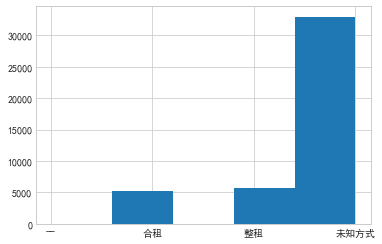

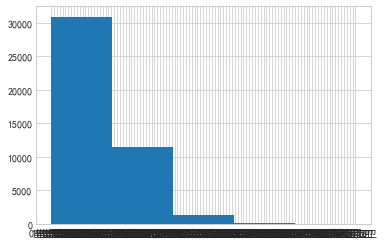

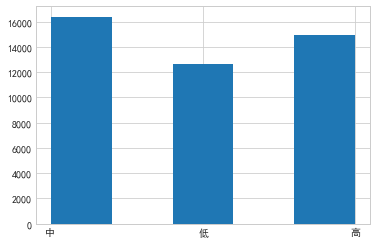

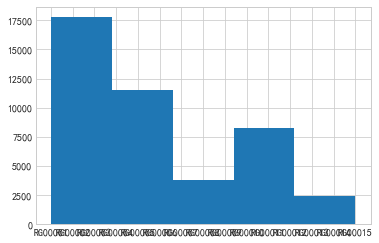

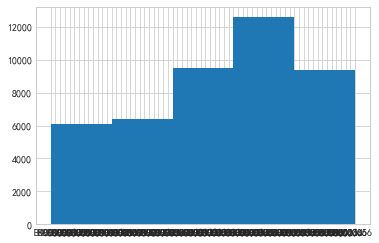

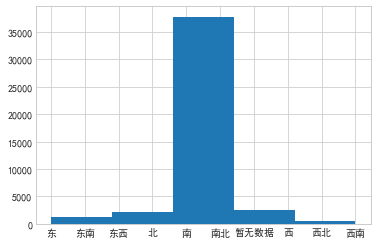

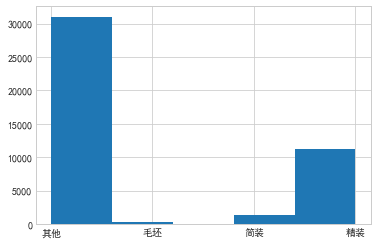

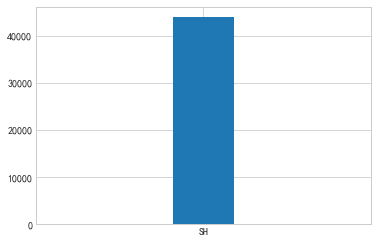

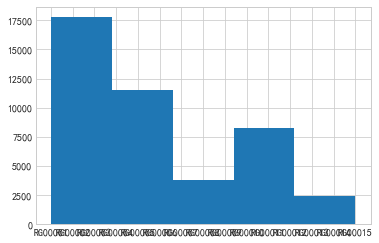

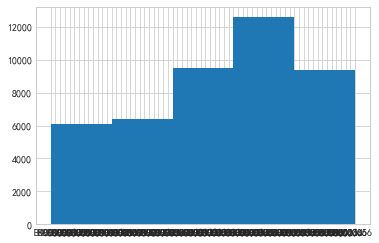

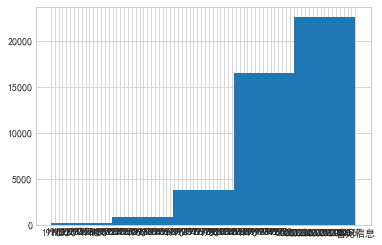

In [30]:
# 特征nunique分布
for feature in categorical_feas:
   # print(feature + "的特征分布如下：")
   # print(data_train[feature].value_counts())
    if feature != 'communityName': # communityName值太多，暂且不看图表
        plt.hist(data_all[feature], bins=5)
        plt.show()

In [14]:
print(data_train['communityName'].value_counts())
print(data_test['communityName'].value_counts())

XQ01834    358
XQ01274    192
XQ02273    188
XQ03110    185
XQ02337    173
          ... 
XQ01302      1
XQ02870      1
XQ01972      1
XQ02671      1
XQ01787      1
Name: communityName, Length: 4236, dtype: int64
XQ03306    1
XQ00629    1
XQ01830    1
XQ00534    1
XQ02021    1
          ..
XQ03596    1
XQ03784    1
XQ00332    1
XQ01140    1
XQ00239    1
Name: communityName, Length: 2469, dtype: int64


### 简要分析
用自带函数value_counts() 来得到每个分类变量的 种类 分布；  
并且简单画出柱状图。  
  
rentType：4种，且绝大多数是无用的未知方式；  
houseType：104种，绝大多数在3室及以下；  
houseFloor：3种，分布较为均匀；  
region：       15种；  
plate：        66种；  
houseToward：    10种；  
houseDecoration： 4种，一大半是其他；  
buildYear：     80种；  
communityName：   4236种，且分布较为稀疏；  
  
此步骤是为之后数据处理和特征工程做准备，先理解每个字段的含义以及分布，之后需要根据实际含义对分类变量做不同的处理。  

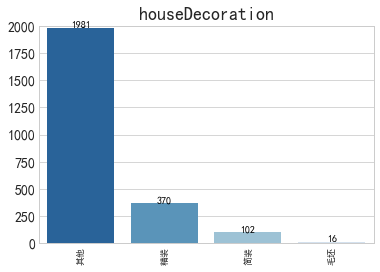

In [48]:
    word= 'houseDecoration' 
    x=data_test[word].value_counts().index
    y=data_test[word].value_counts().values
    sns.barplot(x,y,palette='Blues_r')
    x_z=range(0,100)
    #因为x轴是汉字，所以默认对应的数值是从0开始的
    for a,b in zip(x_z,y):
        plt.text(a, b+0.2, b, color="black",ha="center",fontsize=10)
    plt.ylim([0,2000])
    plt.xticks(rotation='90',fontsize=9)
    plt.yticks(fontsize=14)
    plt.title(word,fontsize=18)
    plt.show()

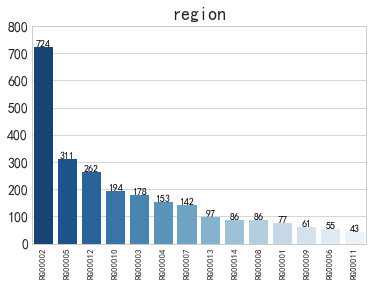

In [46]:
    word= 'region' 
    x=data_test[word].value_counts().index
    y=data_test[word].value_counts().values
    sns.barplot(x,y,palette='Blues_r')
    x_z=range(0,100)
    #因为x轴是汉字，所以默认对应的数值是从0开始的
    for a,b in zip(x_z,y):
        plt.text(a, b+0.2, b, color="black",ha="center",fontsize=10)
    plt.ylim([0,800])
    plt.xticks(rotation='90',fontsize=9)
    plt.yticks(fontsize=14)
    plt.title(word,fontsize=18)
    plt.show()

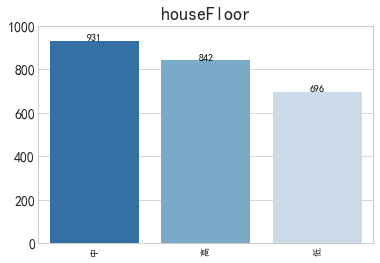

In [44]:
    word= 'houseFloor' 
    x=data_test[word].value_counts().index
    y=data_test[word].value_counts().values
    sns.barplot(x,y,palette='Blues_r')
    x_z=range(0,100)
    #因为x轴是汉字，所以默认对应的数值是从0开始的
    for a,b in zip(x_z,y):
        plt.text(a, b+0.2, b, color="black",ha="center",fontsize=10)
    plt.ylim([0,1000])
    plt.xticks(rotation='90',fontsize=9)
    plt.yticks(fontsize=14)
    plt.title(word,fontsize=18)
    plt.show()

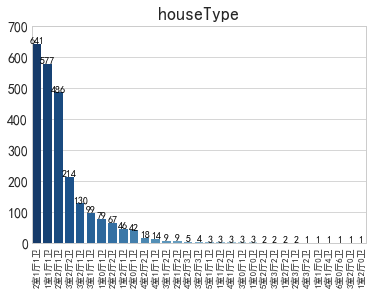

In [42]:
    word= 'houseType' 
    x=data_test[word].value_counts().index
    y=data_test[word].value_counts().values
    sns.barplot(x,y,palette='Blues_r')
    x_z=range(0,100)
    #因为x轴是汉字，所以默认对应的数值是从0开始的
    for a,b in zip(x_z,y):
        plt.text(a, b+0.2, b, color="black",ha="center",fontsize=10)
    plt.ylim([0,700])
    plt.xticks(rotation='90',fontsize=9)
    plt.yticks(fontsize=14)
    plt.title(word,fontsize=18)
    plt.show()

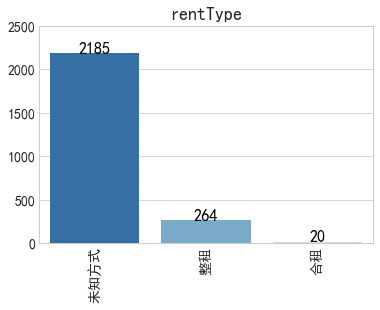

In [34]:
    word= 'rentType' 
    x=data_test[word].value_counts().index
    y=data_test[word].value_counts().values
    sns.barplot(x,y,palette='Blues_r')
    x_z=range(0,7)
    #因为x轴是汉字，所以默认对应的数值是从0开始的
    for a,b in zip(x_z,y):
        plt.text(a, b+0.2, b, color="black",ha="center",fontsize=16)
    plt.ylim([0,2500])
    plt.xticks(rotation='90',fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(word,fontsize=18)
    plt.show()

## 8. 统计特征值频次大于100的特征

In [51]:
# 统计特征值出现频次大于100的特征
for feature in categorical_feas:
    df_value_counts = pd.DataFrame(data_train[feature].value_counts())
    df_value_counts = df_value_counts.reset_index()
    df_value_counts.columns = [feature, 'counts'] # change column names
    #print(df_value_counts[df_value_counts['counts'] >= 100])

### 简要分析
此步骤和特征nunique分布结合步骤结合起来看，有一些小于100的是可以直接统一归类为其他的

## 9. Label分布

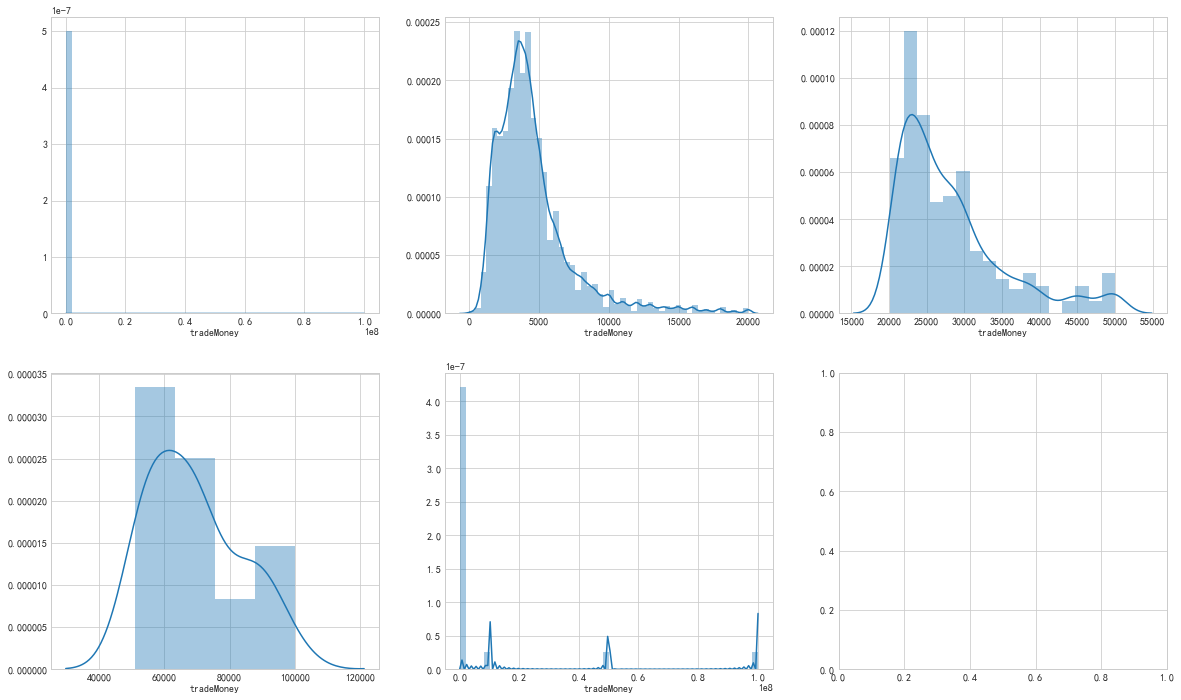

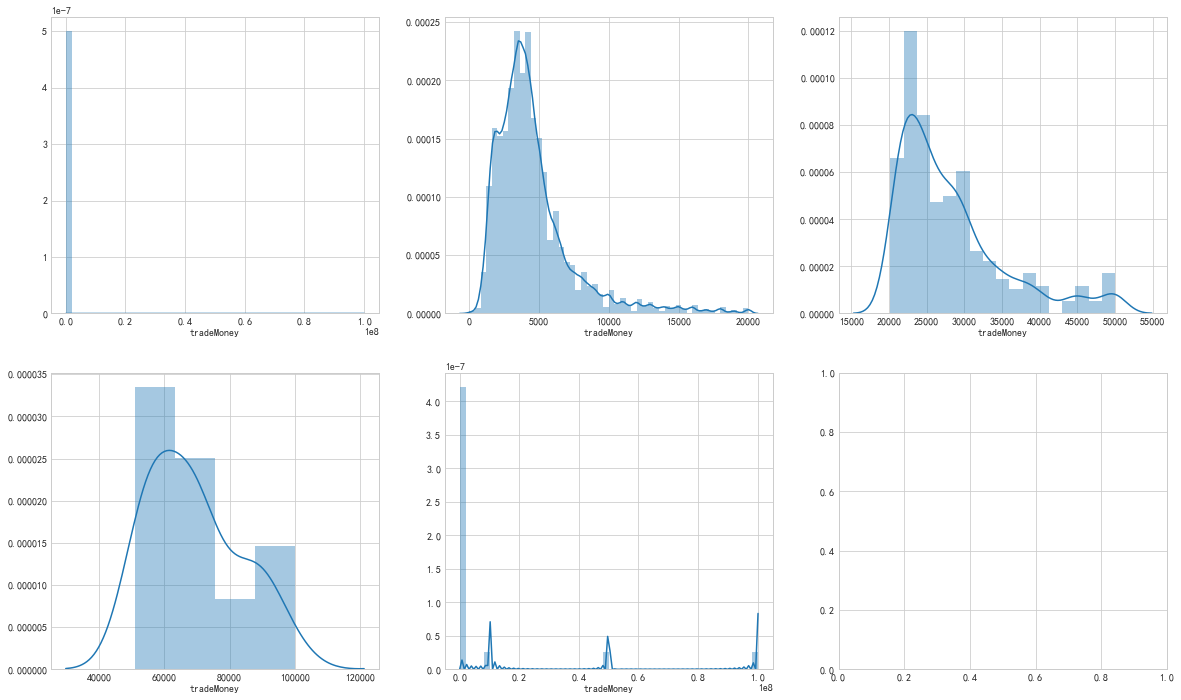

In [50]:
# Labe 分布
fig,axes = plt.subplots(2,3,figsize=(20,5))
fig.set_size_inches(20,12)
sns.distplot(data_train['tradeMoney'],ax=axes[0][0])
sns.distplot(data_train[(data_train['tradeMoney']<=20000)]['tradeMoney'],ax=axes[0][1])
sns.distplot(data_train[(data_train['tradeMoney']>20000)&(data_train['tradeMoney']<=50000)]['tradeMoney'],ax=axes[0][2])
sns.distplot(data_train[(data_train['tradeMoney']>50000)&(data_train['tradeMoney']<=100000)]['tradeMoney'],ax=axes[1][0])
sns.distplot(data_train[(data_train['tradeMoney']>100000)]['tradeMoney'],ax=axes[1][1])
plt.show()

In [19]:
print("money<=10000",len(data_train[(data_train['tradeMoney']<=10000)]['tradeMoney']))
print("10000<money<=20000",len(data_train[(data_train['tradeMoney']>10000)&(data_train['tradeMoney']<=20000)]['tradeMoney']))
print("20000<money<=50000",len(data_train[(data_train['tradeMoney']>20000)&(data_train['tradeMoney']<=50000)]['tradeMoney']))
print("50000<money<=100000",len(data_train[(data_train['tradeMoney']>50000)&(data_train['tradeMoney']<=100000)]['tradeMoney']))
print("100000<money",len(data_train[(data_train['tradeMoney']>100000)]['tradeMoney']))

money<=10000 38964
10000<money<=20000 1985
20000<money<=50000 433
50000<money<=100000 39
100000<money 19


### 简要分析
将目标变量tradeMoney分组，并查看每组间的分布；  
可以看出绝大多数都是集中在10000元以内的，并且从图中可以看到该分布是右偏的。  
  
这里只是一种实现方式，完全可以将tradeMoney和其他字段一起结合起来查看，比如楼层高低，地区板块。  